# Homework: Clustering
<img src="NumPie.svg" width="400" align="right">

## Objectives

- Understand the concept of unsupervised learning
- Learn the _k-means clustering_ algorithm  through implementation
- Practice numerical array computations without `for` or `while` loops


## Background

PizzaPy (see Homework 7) has a new competition in town. The NumPie franchise uses aggresive marketing and state of the art machine learning techniques to maximize its growth and revenue. Fresh out of university you are being hired by the new chain to plan the best locations for the new stores. Your benefit package includes a generous all you can eat option (after five years of employment).

The preliminary dataset contains the geographical (2D) locations of habitual pizza eaters. Based on this information you will identify the clusters of potential customers and their location centers by implementing the [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) algorithm.

**Try to understand each step, and make sure you provide code solutions and/or text inputs for each `#TODO` item (replacing `#TODO` with your input).**

## Step 1: Setup (5 pts)
Please, provide your VUnetID. Also, if you need to import any additional Python modules (you can come back here later), add those import statements in the following code cell. To make the experiment repeatable, add a `np.random.seed()` function call with an arbitrary integer parameter.

**VUnetID** : malcolkd

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#TODO

np.random.seed(1)

## Step 2: Load and visualize the dataset (10 pts)

Use the `np.loadtxt()` function to read the `customters.txt` file into a NumPy array (use `customers` as the variable name for the array). This array contains the 2D coordinates of 250 (`n`) potential customers. Make sure, you understand the shape and meaning of this array. Use the `plt.scatter()` function to create a 2D plot of the locations of the customers. Note: the plot functions expect the `x` and `y` coordinates as separate arrays. E.g. you can select the `x` coordinates from all customers by using `customers[:, 0]`.

(250, 2)


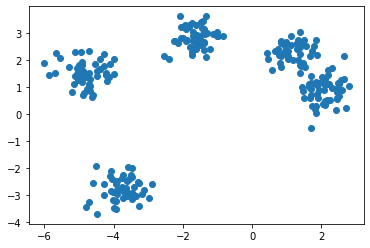

In [4]:
customers = np.loadtxt('customers.txt')

print(customers.shape)

plt.scatter(customers[:, 0], customers[:, 1])

## Step 3: Determine the number of optimal clusters (5 pts)

Use your human intuition based on the scatter plot above to decide how many clusters of customers you want to identify. This is the only step which relies on human brainpower (in practice, this can be automated as well, but that is beyond the scope of the assignment). Set variable `k` to the number of desired clusters.

In [5]:
k = 5

## Step 4: Initialize the cluster centers (15 pts)

The algorithm will keep track (and update) the centers of each cluster and will assign each customer to exactly one cluster based on the distances of the customer and centers. For the initial locations of the cluster centers pick `k` number of random of customer locations and store this array in a new variable, called `centroids`. Verify, that the shape os this array is `(k, 2)`.

In [8]:
#TODO
centroids = customers[np.random.choice(customers.shape[0], k, replace=False), :]

centroids

array([[ 1.7893865 ,  2.51115692],
       [-4.48125654,  1.39627019],
       [-3.59186603, -2.9131017 ],
       [ 1.41974252,  1.7861518 ],
       [-1.71216947,  2.87149625]])

## Step 5: Initialize the cluster assignment (25 pts)

Compute a new 1-dimensional integer array of `n` elements, called `assigment`, which describes the customer to cluster assignment. The assignment is decided on the geographical distances. For each customer store the integer index of the cluster, whose current location center (see `centroids`) is the closest to the customer. Do not use explicit for loops.

Hint: first, compute all the pairwise distances between the customers and all cluster centers using a 3D array and automatic broadcasting. Try to understand the shape and meaning of the following expression: `customers - centroids[:, np.newaxis, :]`. Use this expression with squaring and the NumPy `sum` function (on the proper axis) to compute the pairwise distances. Finally, use `argmin` (on the proper axis) to find the indexes of the closest cluster centers.

In [12]:
#TODO

def compute_distances(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [21]:
all_distances = np.zeros((customers.shape[0], 1, k))
for i in range(k):
    all_distances[:,:,i] = np.reshape(compute_distances(customers[:,0], customers[:,1], centroids[i, 0], centroids[i, 1]), (customers.shape[0], 1))

In [24]:
test = (customers - centroids[:, np.newaxis, :])**2

In [27]:
np.sum(test, axis=1)

array([[4365.35993524, 1651.43331035],
       [4285.49361047, 1071.99289119],
       [3100.31264641, 4676.06862981],
       [3815.33474677, 1203.95963793],
       [1896.73387099, 1971.60807648]])

## Step 5b: Verify the cluster assignment

Execute the code below to verify that the `customers`, `centroids` and `assignment` arrays are properly initialized. You should see the `k` cluster centers in red and the assignments in different colors. Note: this is (obviously) not the final/optimal clustering, yet.

In [ ]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster assignment");

## Step 6: Update the cluster centers (20 pts)

Compute the updated location of the cluster centers. Based on the cluster assignment, compute the mean location of the customers in each cluster. This is going to be the new/updated location of the cluster center (`centroids`).

Hint: This time you may use a (short) loop on the number of clusters. Try to use boolean indexing (masking) with the assignment to select all the customers belonging to the current cluster. You can also use the NumPy `mean()` function (with the proper axis) to compute the mean location of the cluster. 

In [ ]:
#TODO

## Step 6v: Verify the updated cluster centers

Execute the code below to verify that `centroids` is properly updated. While this is still not the final clustering, each center should be at the center of its assigned customers.

In [ ]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Initial cluster centers");

## Step 7: Iterative optimization (20 pts)

Based on steps 5 & 6 (you can use copy & paste), implement a loop which iteratively updates the cluster assignment and the cluster centers as long as there is some change in the cluster assignment.

In [ ]:
#TODO

## Step 7v: Verify the final clusters

Execute the code below to see the final clusters. Note: while the results should look reasonable, it is not guaranteed that the algorithm finds the most optimal clusters and centers (becuase of the initial random picks of the centers). Try to run the notebook multiple times (you may want to use  `np.random.seed()` with different parameters at the start) to see if you can get the desired/optimal result.

In [ ]:
plt.scatter(customers[:, 0], customers[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")
plt.title("Final clusters");

## Grading

In this assignment you will not have access to an autograder program (i.e. _validator_ ). Your work will be inspected and graded manually. Make sure you took care of every `#TODO` items in your assignment. Also, verify, that your notebook document can be executed sequentially from a clean state. You can do this by using the _"Kernel/Restart & Run All"_ menu item and checking your results.

### Penalties

Your work will not be checked for PEP8 style problems. Still, try to write readable and concise code.

## Submission

Please, upload the final version of this notebook file (`clustering.ipynb`) to Brightspace.